# Try data augmentation

In [1]:
from data import DiabeticRetinopathyDataset, Resize, CropBlack, RandomCrop, RandomFlip, RandomElasticDeformation
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
import numpy as np
import cv2

In [2]:
DATA_FOLDER = "data"
TRAIN_FOLDER = "train"
TRAIN_LABELS_CSV = "trainLabels.csv"  # "trainLabels.csv"

BATCH_SIZE = 5


In [3]:
DR_dataset = DiabeticRetinopathyDataset(
    TRAIN_LABELS_CSV,
    DATA_FOLDER,
    TRAIN_FOLDER,
    transform=transforms.Compose([Resize(output_size=260), RandomCrop(output_size=224), RandomFlip(), RandomElasticDeformation()]),  # output size depends on the model
    size=20,
)
# train_set, val_set = DR_dataset.train_val_split(split_rate=0.8)
generator = torch.Generator().manual_seed(42)
train_set, val_set = torch.utils.data.random_split(DR_dataset, [0.8, 0.2], generator=generator)

In [4]:
h = 15
output_size = 15
crop = np.random.randint(low=0, high=h-output_size+1)
assert len(np.arange(h)[crop:crop+output_size]) == output_size

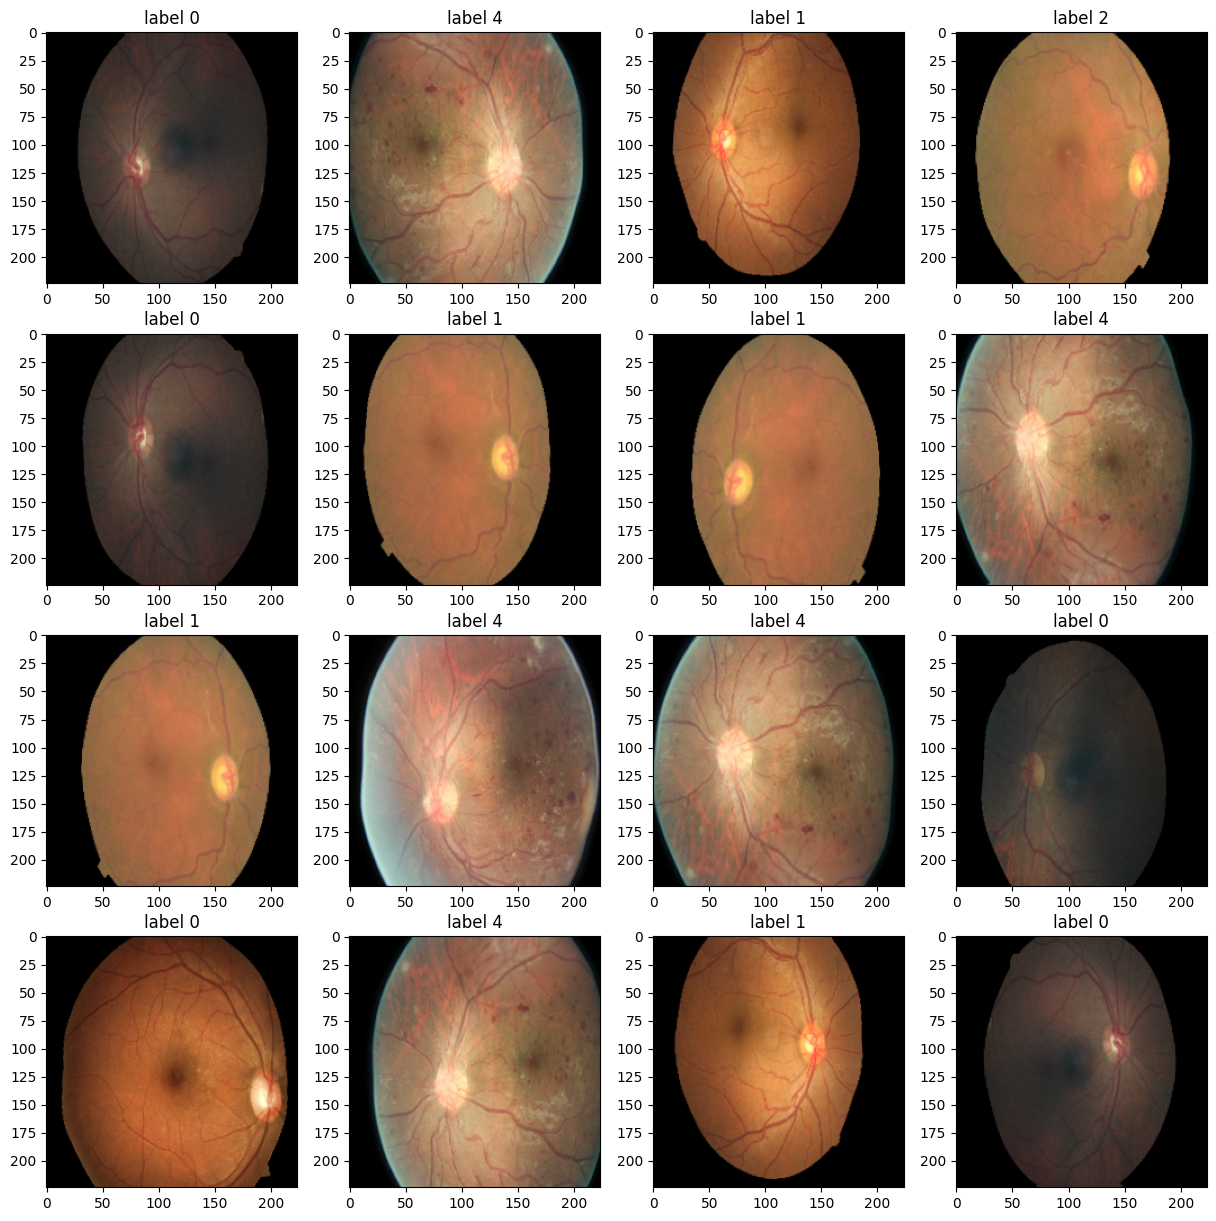

In [5]:
def visualise_random_sampled(size = (4, 4)):
    torch.manual_seed(67)
    random_indices = torch.randint(0, len(DR_dataset), size=size)
    
    fig, axs = plt.subplots(*random_indices.shape, figsize=(15, 15))
    for i in range(random_indices.shape[0]):
        for j in range(random_indices.shape[1]):
            idx = random_indices[i, j]
            im, label = DR_dataset[idx]
            ax = axs[i,j]
            ax.set_title(f"label {label}")
            ax.imshow(im.permute(1, 2, 0))
    # plt.tight_layout()
    
visualise_random_sampled()
# Some eyes are already not fully captured by the original image 